In [1]:
import pandas as pd

## Load data from S3 bucket

In [2]:
df = pd.read_csv('https://s3grouparmenia.s3.eu-central-1.amazonaws.com/Transcripts_with_sentiment_topic')

In [3]:
df.sample(3)

,Unnamed: 0,Year_x,Session_x,Country_x,Transcript,dominant_topic,topic_name,polarity,subjectivity,neg,neu,pos,compound
7328,7328,2006,61,BIH,great honour pleasure address sixty first sess...,6,world peace,0.078907,0.402322,0.136,0.607,0.257,0.9994
4958,4958,1984,39,MLT,﻿i would like first congratulate mr lusaka ele...,0,development of africa,0.087885,0.424180,0.102,0.649,0.250,0.9999
4837,4837,1997,52,NER,﻿onbehalf delegation niger like sir toexpress ...,6,world peace,0.112018,0.459397,0.102,0.619,0.280,0.9997


In [5]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

## Train - Test split

In [31]:
#, 'neg', 'neu', 'pos', 'compound' can be added as well
Train, Test = train_test_split(df[['polarity', 'subjectivity']], test_size=0.3)

In [32]:
Train.sample(3)

,polarity,subjectivity
559,0.130688,0.401838
4102,0.073211,0.456173
2439,0.086522,0.433862


## First clustering attempt with 5 clusters and random init

In [34]:
k_means = KMeans(n_clusters=5, n_init=10, init='random')

In [35]:
k_means.fit(Train)

KMeans(init='random', n_clusters=5)

In [36]:
labels = k_means.labels_
centers = k_means.cluster_centers_

In [37]:
labels

array([0, 1, 0, ..., 2, 0, 4], dtype=int32)

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

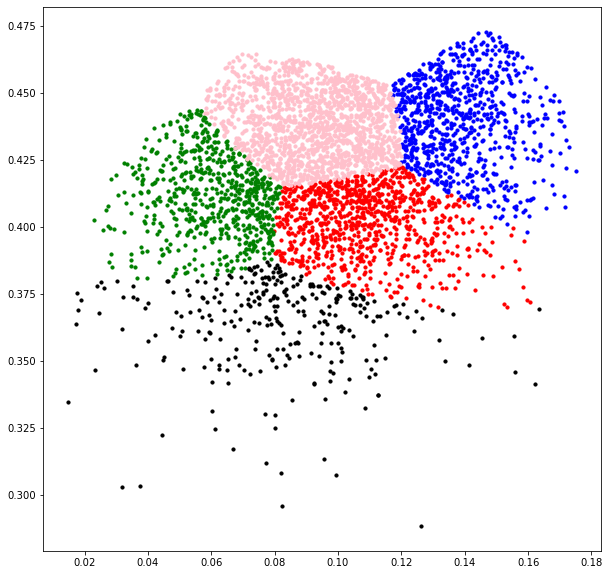

In [73]:
fig = plt.figure(figsize=[10,10])
# get the elemnets that belong to cluster 0
idx_0 = labels ==0
# Plot the cluster 0 elements in red
plt.scatter(Train.iloc[idx_0,0],Train.iloc[idx_0,1],s=10,color='red')
# get elements that belong to cluster 1
idx_0 = labels ==1
# Plot the elemntes of cluster 1 in blue
plt.scatter(Train.iloc[idx_0,0],Train.iloc[idx_0,1],s=10,color='blue')
idx_0 = labels ==2
# Plot the cluster 0 elements in red
plt.scatter(Train.iloc[idx_0,0],Train.iloc[idx_0,1],s=10,color='green')
# get elements that belong to cluster 1
idx_0 = labels ==3
# Plot the elemntes of cluster 1 in blue
plt.scatter(Train.iloc[idx_0,0],Train.iloc[idx_0,1],s=10,color='pink')
idx_0 = labels ==4
# Plot the elemntes of cluster 1 in blue
plt.scatter(Train.iloc[idx_0,0],Train.iloc[idx_0,1],s=10,color='black')


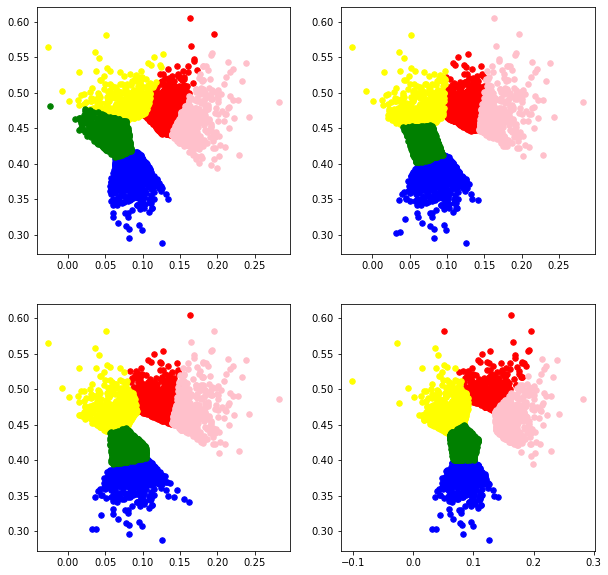

In [40]:
fig = plt.figure(figsize=[10,10])
i=0
# Iterate over different values for the number of iterations
for n in [1,10,20,100]:
    i += 1
    ax=plt.subplot(2,2,i)
    # Calculate the clustering for the current number of iterations 
    k_means = KMeans(n_clusters=8, n_init=1,init='random', random_state=0, max_iter=n)
    k_means.fit(Train)
    labels = k_means.labels_
    idx_0 = labels ==0
    ax.scatter(Train.iloc[idx_0,0],Train.iloc[idx_0,1],s=30, color='red')
    idx_1 = labels ==1
    ax.scatter(Train.iloc[idx_1,0],Train.iloc[idx_1,1],s=30, color='blue')
    idx_2 = labels ==2
    ax.scatter(Train.iloc[idx_2,0],Train.iloc[idx_2,1],s=30, color='yellow')    
    idx_3 = labels ==3
    ax.scatter(Train.iloc[idx_3,0],Train.iloc[idx_3,1],s=30, color='green') 
    idx_4 = labels ==4
    ax.scatter(Train.iloc[idx_4,0],Train.iloc[idx_4,1],s=30, color='pink') 

## Plotting inertia for varying numbers of clusters

Inertia is the sum of squared error for each cluster. Therefore the smaller the inertia the denser the cluster(closer together all the points are). Obviously the higher the number of clusters, the less inertia is. The question is where to stop adding clusters?

Text(0, 0.5, 'inertia_')

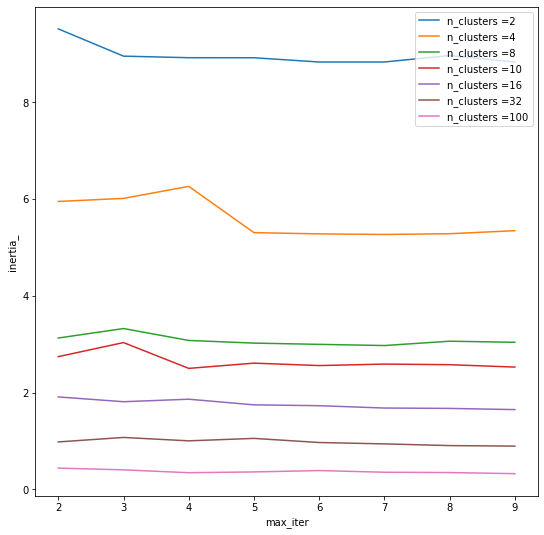

In [68]:
# array of values to use for the "max_iter" parameter
nbr = np.arange(2,10,1)
# Number of k clusters to use
clusters = [2, 4, 8, 10, 16, 32, 100]
dist = np.zeros(shape=(len(nbr), len(clusters)))
i = 0
for n in nbr:
    j = 0
    # Iterate over the cluster values
    for c in clusters:
        # Compute the Kmeans algorithm
        k_means = KMeans(n_clusters=c, n_init=1,init='random',max_iter=n)
        k_means.fit(Train)
        dist[i,j] = k_means.inertia_
        j +=1
    i += 1
    

fig = plt.figure(figsize=(9,9))
i=0
# Plot the results for each cluster
for c in clusters:
    plt.plot(nbr,dist[:,i],label='n_clusters =' + str(c))
    i +=1
plt.legend() 
plt.xlabel('max_iter')
plt.ylabel('inertia_')


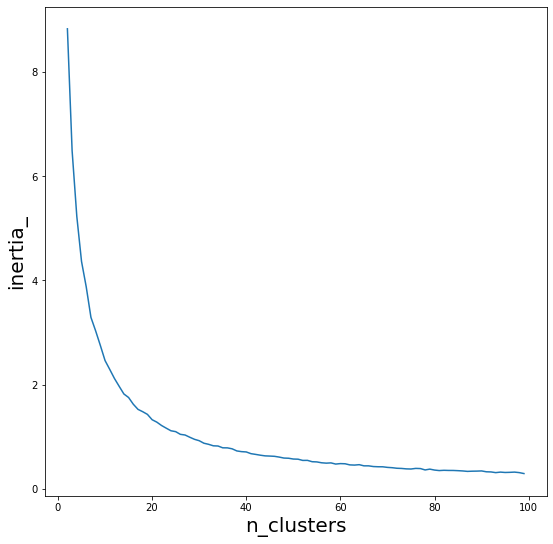

In [97]:
# Array for the number of clusters, min = 2 and max =100
clusters = np.arange(2,100,1)
dist = np.zeros(shape=(len(clusters),1))
i = 0
# Iterate over all numbers of clusters
for c in clusters:
    k_means = KMeans(n_clusters=c, n_init=1,init='random')
    k_means.fit(Train)
    dist[i,0]=k_means.inertia_
    i +=1
# Print the inertia vs the number of clusters used by the algorithm
fig = plt.figure(figsize=(9,9))
plt.plot(clusters,dist[:,0])
plt.xlabel('n_clusters',fontsize=20)
plt.ylabel('inertia_',fontsize=20);

## More compact code to play with clustering and plotting

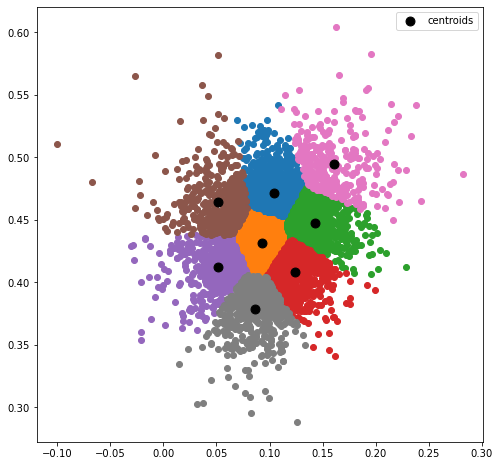

In [44]:
import numpy as np

kmeans = KMeans(n_clusters=8)
kmeans.fit(Train)
y_label = kmeans.predict(Train)

fix , ax = plt.subplots(1,1,figsize=(8,8))
for i in np.unique(y_label):
    idx = y_label==i
    ax.scatter(Train.iloc[idx,0],Train.iloc[idx,1])

#plotting the centroids
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='k',s=80.0,label='centroids')
ax.legend();

## Spectral clustering

In [59]:
# All this stuff is needed to do before trying to fit a spectral clustering model

from sklearn.neighbors import kneighbors_graph 

A = kneighbors_graph(Train, n_neighbors=5).toarray()
#pd.DataFrame(A).head()

D = np.diag(A.sum(axis=1))
L = D-A

vals, vecs = np.linalg.eig(L)
vals = np.real(vals)
vecs = np.real(vecs)

vecs_sorted = vecs[:,np.argsort((vals))]
vals_sorted = vals[np.argsort((vals))]

U = np.array((vecs_sorted[:,1])).reshape(-1,1)

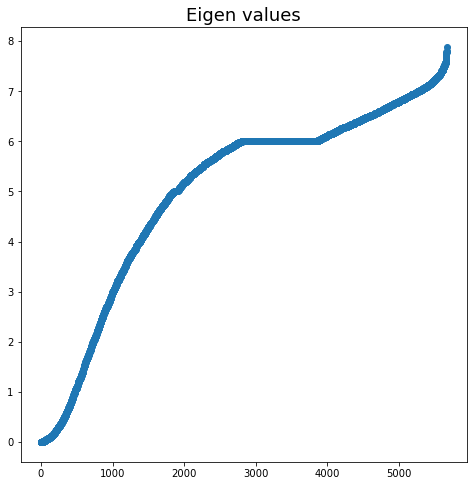

In [60]:
#fig , ax = plt.subplots(1,1,figsize=(8,8))
#ax.scatter(np.arange(0,len(vals_sorted)),abs(vals_sorted))
#ax.set_title('Eigen values',fontsize=18);

In [62]:
km = KMeans(init='k-means++', n_clusters=5,random_state=0)
km.fit(U);

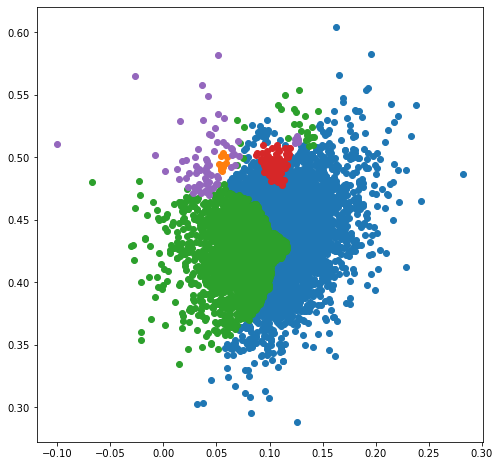

In [64]:
fig,ax = plt.subplots(1,1,figsize=(8,8))

plt.scatter(Train.iloc[km.labels_==0,0],Train.iloc[km.labels_==0,1])
plt.scatter(Train.iloc[km.labels_==1,0],Train.iloc[km.labels_==1,1])
plt.scatter(Train.iloc[km.labels_==2,0],Train.iloc[km.labels_==2,1])
plt.scatter(Train.iloc[km.labels_==3,0],Train.iloc[km.labels_==3,1])
plt.scatter(Train.iloc[km.labels_==4,0],Train.iloc[km.labels_==4,1])

## Gaussian Mixture Models

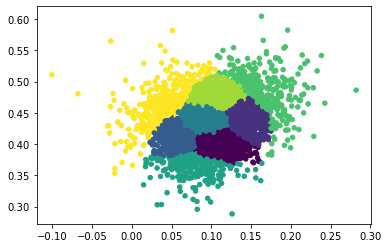

In [65]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=8).fit(Train)
labels = gmm.predict(Train)
plt.scatter(Train.iloc[:, 0], Train.iloc[:, 1], c=labels, s=20, cmap='viridis');

In [87]:
from sklearn import mixture

clf = mixture.GaussianMixture(n_components=8)
clf.fit(Train)

GaussianMixture(n_components=8)

In [88]:
from scipy.stats import norm

avg_ret = clf.means_.ravel()
stdev = clf.covariances_.ravel()

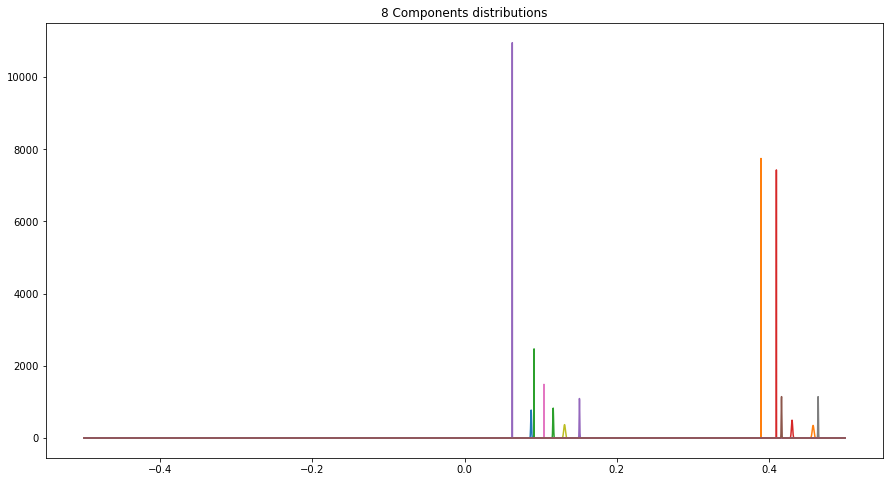

In [90]:
fig , ax = plt.subplots(1,1,figsize=(15,8))

x = np.arange(-0.5,0.5,0.0002)
ax.set_title('8 Components distributions')
for avg, std in zip(avg_ret,stdev):
    ax.plot(x, norm.pdf(x,loc=avg,scale=std))

## AIC and BIC scores can be used to choose the optimal number of components

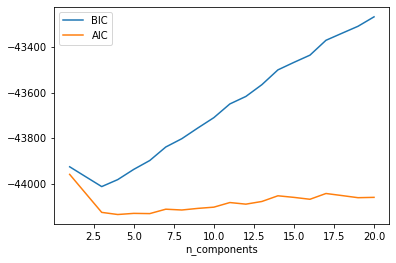

In [95]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Train)
          for n in n_components]

plt.plot(n_components, [m.bic(Train) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Train) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');